# lambeq high-level tutorial

This notebook contains the code from the `lambeq` tutorial.


## Step 1. Sentence input

### Syntax-based model

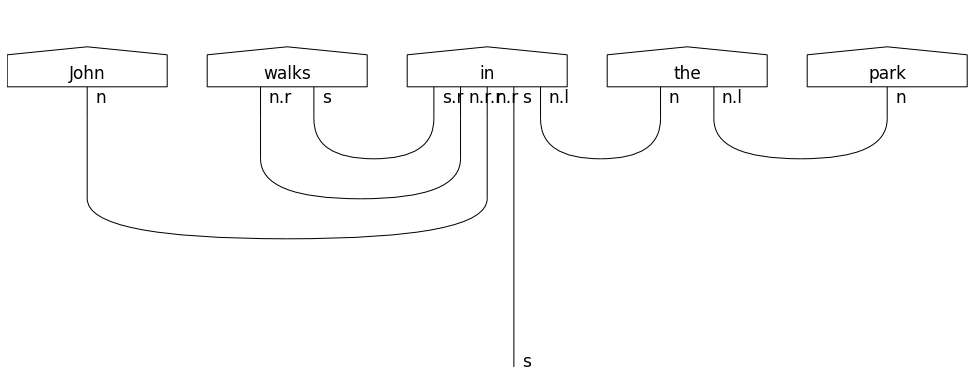

In [1]:
from lambeq.ccg2discocat import DepCCGParser
from discopy import grammar

sentence = 'John walks in the park'

# Parse the sentence and convert it into a string diagram
depccg_parser = DepCCGParser()
diagram = depccg_parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(15,5), fontsize=17)

### Bag-of-words model

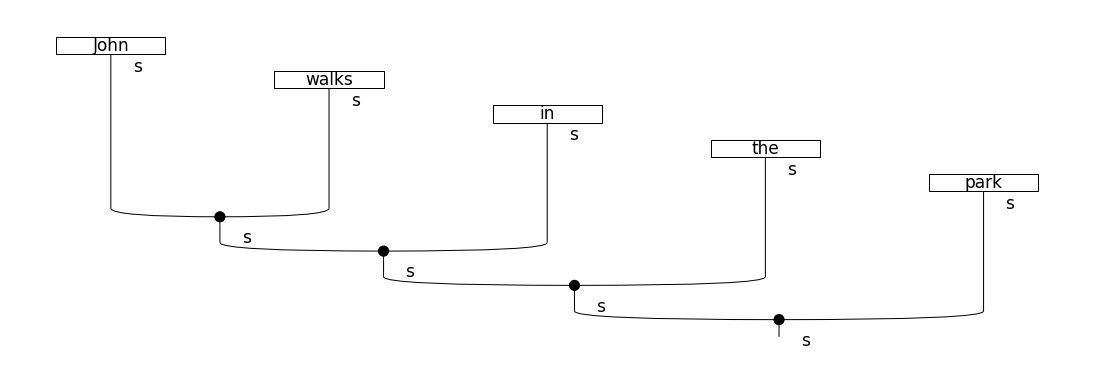

In [2]:
from lambeq.reader import spiders_reader

# Create string diagrams based on spiders reader
spiders_diagram = spiders_reader.sentence2diagram(sentence)

spiders_diagram.draw(figsize=(15,5), fontsize=17)

### Word-sequence model

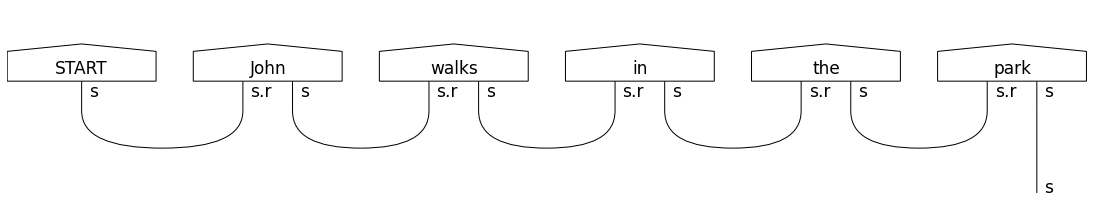

In [3]:
from lambeq.reader import cups_reader

# Create string diagrams based on cups reader
cups_diagram = cups_reader.sentence2diagram(sentence)

grammar.draw(cups_diagram, figsize=(15,3), fontsize=17)

## Step 2. Diagram rewriting

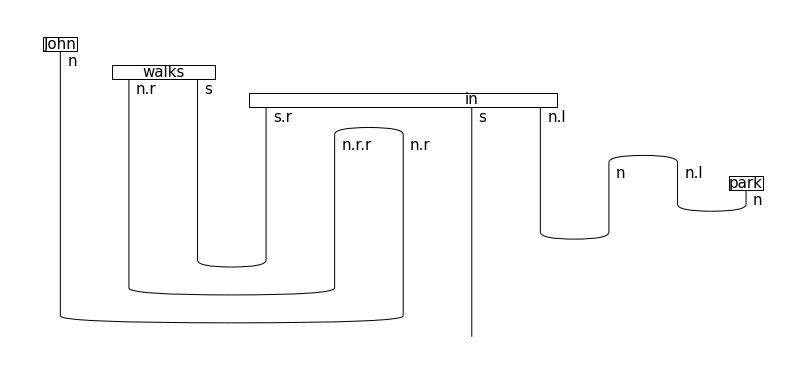

In [4]:
from lambeq.rewrite import Rewriter

# Parse the sentence
diagram = depccg_parser.sentence2diagram(sentence)

# Apply rewrite rule for prepositional phrases
rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

rewritten_diagram.draw(figsize=(11,5), fontsize=15)

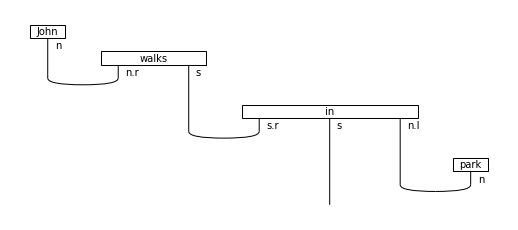

In [5]:
rewritten_diagram.normal_form().draw(figsize=(7,3))

## Step 3. Parameterisation

### Quantum case

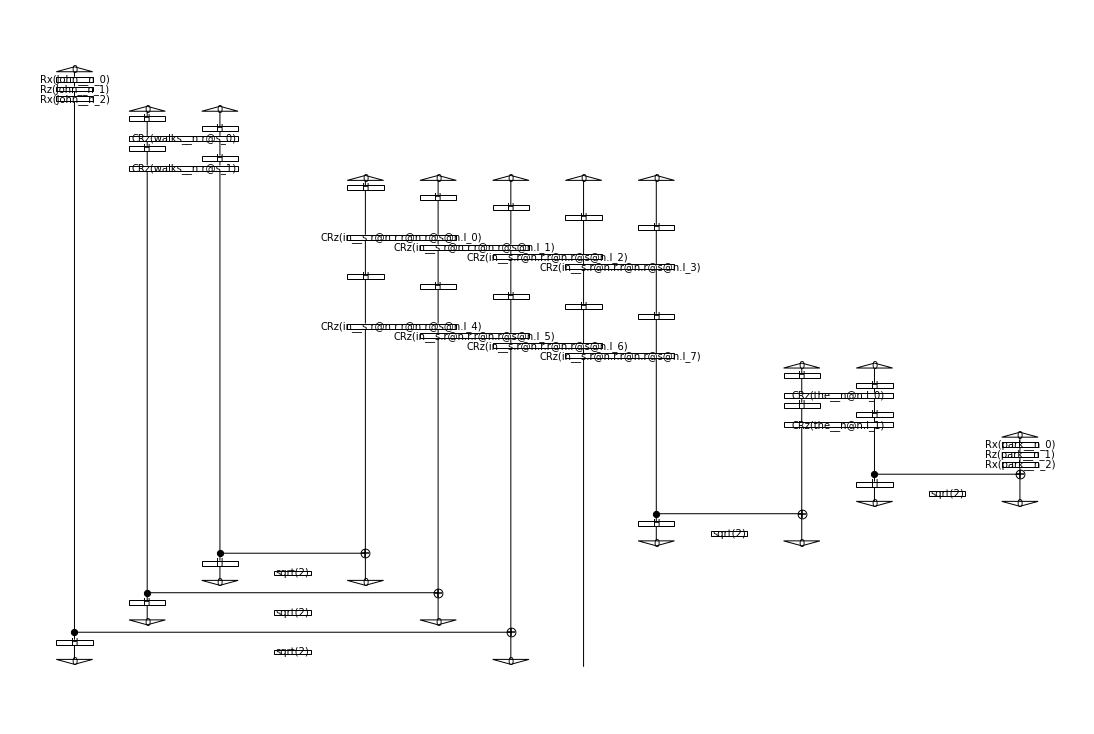

In [6]:
from lambeq.circuit import IQPAnsatz
from lambeq.core.types import AtomicType

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

In [7]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = discopy_circuit.to_tk()

# This does not render properly on GitHub, please view it at:
# https://cqcl.github.io/lambeq/examples/doc_tutorial.html
render_circuit_jupyter(tket_circuit)

### Classical case

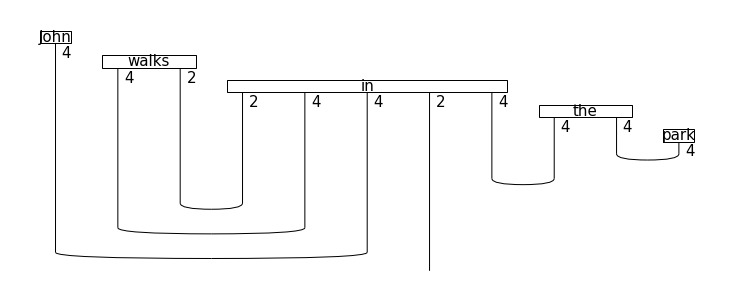

In [8]:
from lambeq.ccg2discocat import DepCCGParser
from lambeq.tensor import TensorAnsatz
from discopy import Dim

sentence = 'John walks in the park'

# Parse the sentence and convert it into a string diagram
depccg_parser = DepCCGParser()
diagram = depccg_parser.sentence2diagram(sentence)

tensor_ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)
tensor_diagram.draw(figsize=(10,4), fontsize=15)

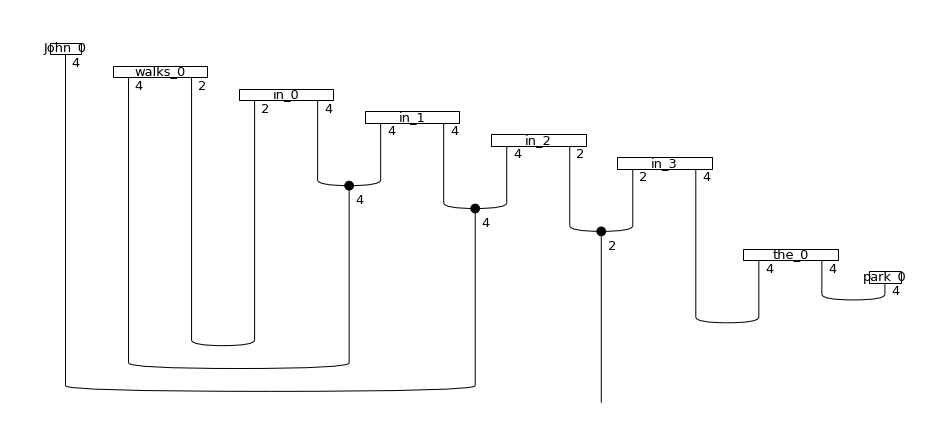

In [9]:
from lambeq.tensor import SpiderAnsatz
from discopy import Dim

spider_ansatz = SpiderAnsatz({N: Dim(4), S: Dim(2)})
spider_diagram = spider_ansatz(diagram)
spider_diagram.draw(figsize=(13,6), fontsize=13)

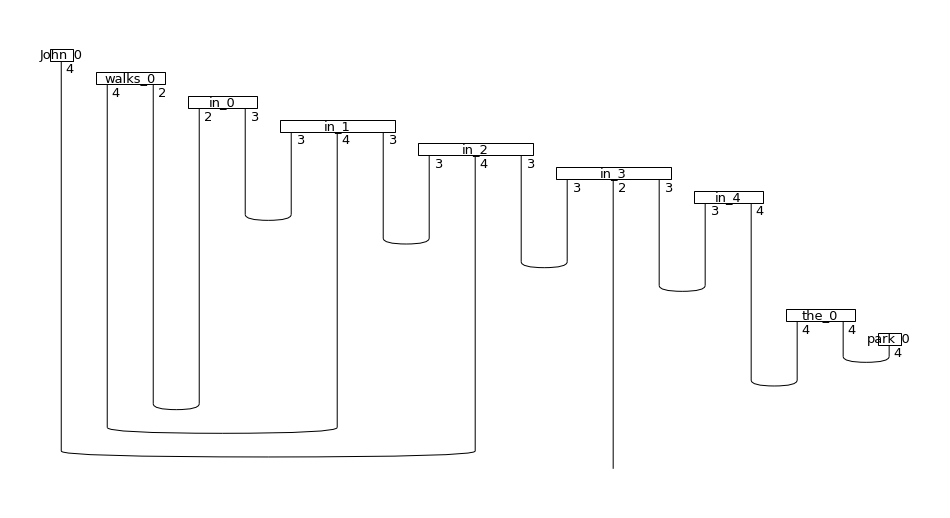

In [10]:
from lambeq.tensor import MPSAnsatz
from discopy import Dim

mps_ansatz = MPSAnsatz({N: Dim(4), S: Dim(2)}, bond_dim=3)
mps_diagram = mps_ansatz(diagram)
mps_diagram.draw(figsize=(13,7), fontsize=13)